# **Instalar o OSMnx e outras bibliotecas necessárias:**

In [1]:
# Instalação da biblioteca
pip install osmnx

SyntaxError: invalid syntax (<ipython-input-1-aa5d67dba62d>, line 2)

In [ ]:
# Checagem da versão da biblioteca
import networkx as nx
import osmnx as ox

ox.__version__

'1.9.4'

# **Baixar a rede viária de Felipe Camarão:**

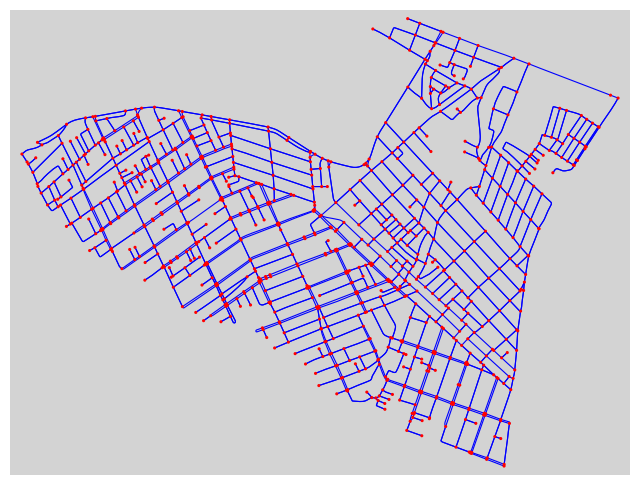

In [ ]:
# Download dos dados da rede viária do bairro de Felipe Camarão
G = ox.graph_from_place("Felipe Camarão ,Natal, Rio Grande do Norte, Brasil", network_type="drive") # Visualização para veículos motorizados (carros, caminhões, motos, etc.).

# Personalizando o grafo
fig, ax = ox.plot_graph(
    G,
    node_color="red",        # Cor dos nós
    node_size=5,             # Tamanho dos nós
    edge_color="blue",       # Cor das arestas
    edge_linewidth=0.8,      # Largura das arestas
    bgcolor="lightgray"      # Cor de fundo do gráfico
)

No mapa gerado pelo OSMnx, os nós e as arestas representam elementos fundamentais da rede viária:

1. Nós (Nodes):
Os nós correspondem a interseções, cruzamentos, ou pontos onde as ruas começam ou terminam (como entradas/saídas e entroncamentos).

2. Arestas (Edges):
As arestas são as ruas ou segmentos de ruas que conectam dois nós. Elas representam os trechos viários percorríveis entre interseções ou outros pontos significativos da rede.


# **Análise de algumas métricas**

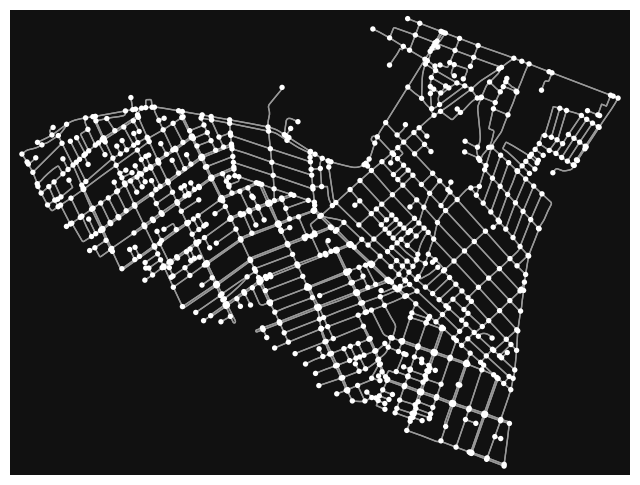

In [ ]:
# Obter a rede viária para pedestres (walk) em uma área específica
G_walk = ox.graph_from_place("Felipe Camarão, Natal, Rio Grande do Norte, Brasil", network_type="walk")
fig, ax = ox.plot_graph(G_walk)

# Pergutas

1. **Quantos componentes conectados existem na rede viária de Felipe Camarão e qual é o tamanho do maior componente conectado (componente gigante)?**


Componentes conectados são sub-redes em que todos os pontos (interseções ou nós) estão conectados uns aos outros.
O número total de componentes conectados indica quantas partes isoladas existem na rede. Se houver muitos componentes, isso pode indicar fragmentação, como ruas sem saída ou vias desconectadas.
O tamanho do maior componente (componente gigante) mostra a maior parte conectada da rede, o que é essencial para entender a acessibilidade geral da área.

Importância: Avaliar se a maioria das ruas do bairro está conectada de maneira que permite o fluxo contínuo de tráfego e pedestres.

Número total de componentes conectados: 1
Tamanho do maior componente conectado: 900


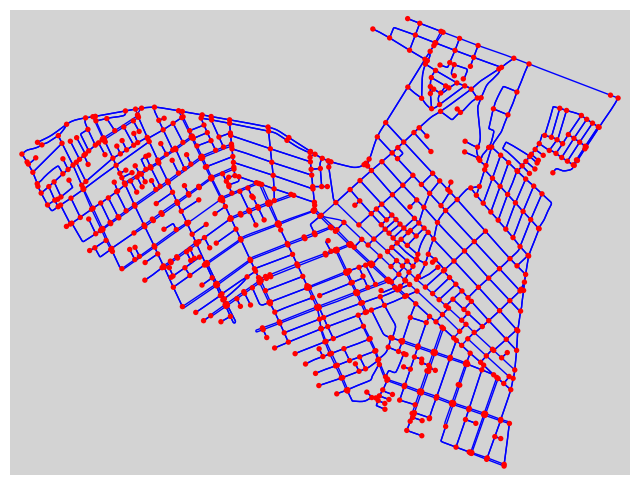

In [ ]:
import osmnx as ox
import networkx as nx

# Baixar a rede viária para veículos do bairro Felipe Camarão
G = ox.graph_from_place("Felipe Camarão, Natal, Rio Grande do Norte, Brasil", network_type="drive")

# Encontrar os componentes conectados da rede
connected_components = list(nx.strongly_connected_components(G))

# Número total de componentes conectados
num_components = len(connected_components)
print(f"Número total de componentes conectados: {num_components}")

# Encontrar o maior componente conectado (componente gigante)
largest_component = max(connected_components, key=len)
G_largest = G.subgraph(largest_component).copy()
largest_component_size = len(largest_component)
print(f"Tamanho do maior componente conectado: {largest_component_size}")

# Visualizar o maior componente conectado
fig, ax = ox.plot_graph(G_largest, node_color="red", edge_color="blue", bgcolor="lightgray")


Explicação Detalhada

Número total de componentes conectados: 1

Isso significa que toda a rede viária de Felipe Camarão é fortemente conectada.
Em termos simples, todas as interseções e ruas da rede estão conectadas de forma que é possível, respeitando as direções das vias, se deslocar de qualquer ponto da rede para qualquer outro ponto.
Um valor de 1 indica que não existem partes isoladas ou fragmentadas; ou seja, todas as ruas fazem parte de um único grande componente.


Tamanho do maior componente conectado: 900

Este valor indica que o maior componente conectado (ou componente gigante) contém 900 nós.
Como o número total de componentes conectados é 1, significa que a rede inteira é composta por esses 900 nós, o que representa todos os cruzamentos, interseções, e pontos importantes do sistema viário no bairro de Felipe Camarão.
Este tamanho reflete a extensão e densidade da rede viária da região. Quanto maior o número de nós, mais complexa e conectada é a infraestrutura viária.


**2. Qual é o coeficiente de agrupamento (clustering coefficient) médio da rede?**

O coeficiente de agrupamento mede a probabilidade de que dois nós vizinhos de um nó também sejam vizinhos entre si, formando triângulos (ou ciclos pequenos) na rede. Em uma rede viária, um alto coeficiente de agrupamento indica que há muitas interseções que formam rotas alternativas e conexões locais redundantes, melhorando a robustez da rede e oferecendo múltiplos caminhos para um mesmo destino.

Importância: Avaliar a conectividade local e a flexibilidade do tráfego, identificando se há rotas alternativas para evitar congestionamentos.

In [ ]:
import osmnx as ox
import networkx as nx

# Baixar a rede viária para veículos do bairro
G = ox.graph_from_place("Felipe Camarão, Natal, Rio Grande do Norte, Brasil", network_type="drive")

# Converter o multigrafo para um grafo simples
G_simple = nx.Graph(G)

# Calcular o coeficiente de agrupamento para cada nó
clustering_coeffs = nx.clustering(G_simple)

# Calcular o coeficiente de agrupamento médio
average_clustering_coeff = sum(clustering_coeffs.values()) / len(clustering_coeffs)

# Exibir o resultado
print(f"Coeficiente de agrupamento médio da rede: {average_clustering_coeff:.4f}")


Coeficiente de agrupamento médio da rede: 0.0499


# **Baixar a rede viária de Santa Maria:**

Número total de componentes conectados: 30
Tamanho do maior componente conectado: 3254


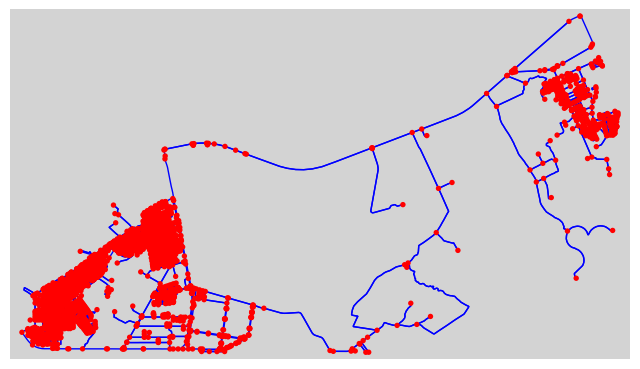

In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
# Baixar a rede viária para veículos do bairro Felipe Camarão
G = ox.graph_from_place("Santa Maria, Brasília, Distrito Federal, Brasil", network_type="drive")

# Encontrar os componentes conectados da rede
connected_components = list(nx.strongly_connected_components(G))

# Número total de componentes conectados
num_components = len(connected_components)
print(f"Número total de componentes conectados: {num_components}")

# Encontrar o maior componente conectado (componente gigante)
largest_component = max(connected_components, key=len)
G_largest = G.subgraph(largest_component).copy()
largest_component_size = len(largest_component)
print(f"Tamanho do maior componente conectado: {largest_component_size}")

# Visualizar o maior componente conectado
fig, ax = ox.plot_graph(G_largest, node_color="red", edge_color="blue", bgcolor="lightgray")


Número total de componentes conectados: 30

Isso significa que a rede viária de Santa Maria (ou o bairro que você analisou) tem 30 componentes conectados distintos.
Cada um desses componentes representa um conjunto de interseções e ruas que estão interconectadas, mas que não têm conexão direta com os outros componentes. Isso indica uma fragmentação significativa na rede viária, onde partes da área não estão acessíveis de forma contínua entre si.
A presença de múltiplos componentes pode sugerir áreas isoladas, ruas sem saída, ou uma estrutura de desenvolvimento urbano que não promove a conectividade entre as diferentes partes do bairro.
Tamanho do maior componente conectado: 3254

Este número indica que o maior grupo de ruas interconectadas na rede possui 3254 nós.
Isso significa que, dentro desse maior componente, existem 3254 interseções ou pontos significativos que estão todos conectados entre si.
Embora exista um componente gigante, o fato de haver 29 outros componentes menores sugere que existem outras áreas da rede que não têm acesso direto a esse maior componente.